Train-Test Split

In [2]:
import pandas as pd
df_clean = pd.read_csv("cleaned_scaled.csv")
# Features and target
X = df_clean.drop("target", axis=1)   
y = df_clean["target"]                


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Train multiple models

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = {}

In [32]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("F1-score (macro):", f1_score(y_test, y_pred, average='macro',zero_division=0))
    print("\n")

=== Logistic Regression ===
Accuracy: 0.5760869565217391
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80        82
           1       0.46      0.53      0.49        53
           2       0.33      0.14      0.19        22
           3       0.24      0.24      0.24        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.36      0.35      0.34       184
weighted avg       0.53      0.58      0.55       184

Confusion Matrix:
 [[70  9  0  3  0]
 [16 28  4  5  0]
 [ 1 13  3  5  0]
 [ 5 10  1  5  0]
 [ 1  1  1  3  0]]
F1-score (macro): 0.3445743390734902


=== Decision Tree ===
Accuracy: 0.45108695652173914
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64        82
           1       0.40      0.42      0.41        53
           2       0.21      0.18      0.2

Compare Model Accuracies

In [9]:
import matplotlib.pyplot as plt

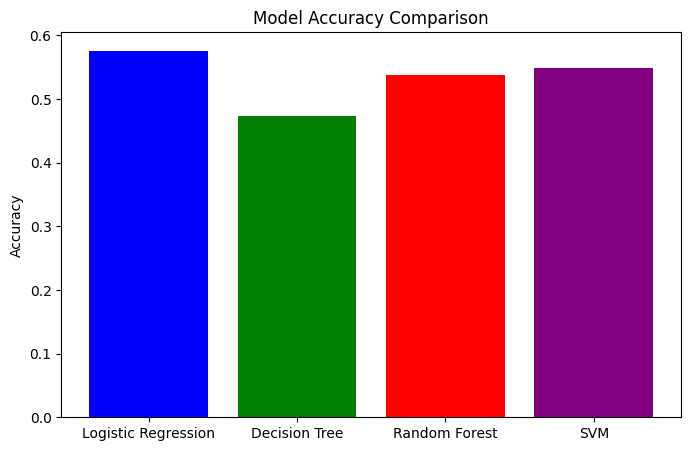

In [10]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['blue','green','red','purple'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [ ]:
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f"\n{name} Report:\n")
    print(classification_report(y_test, y_pred))

ROC Curve & Macro-AUC

In [24]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [25]:
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_score = rf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, cls in enumerate(classes):
    fpr[cls], tpr[cls], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[cls] = auc(fpr[cls], tpr[cls])

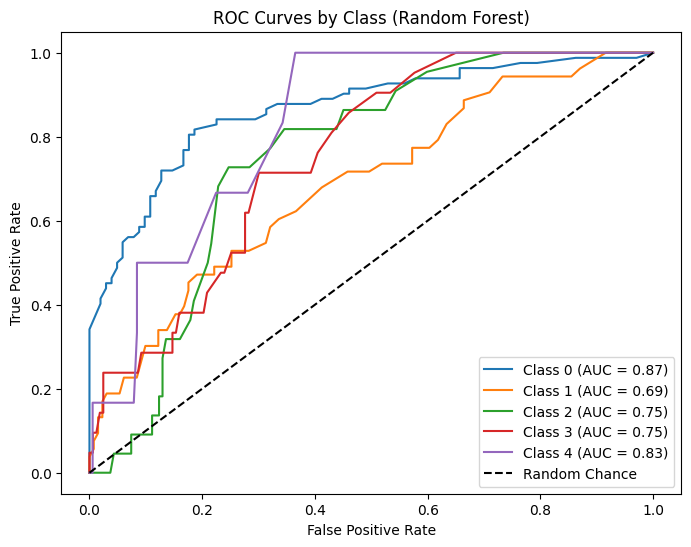

In [26]:
plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    plt.plot(fpr[cls], tpr[cls], label=f"Class {cls} (AUC = {roc_auc[cls]:.2f})")

plt.plot([0,1], [0,1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves by Class (Random Forest)")
plt.legend(loc="lower right")
plt.show()

In [27]:
macro_auc = np.mean(list(roc_auc.values()))
print( macro_auc)

0.7767866961668783
